Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/incomplete.HL31CR_0.1.0/beans-train.tfrecord*...:   0%|          | 0…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/incomplete.HL31CR_0.1.0/beans-validation.tfrecord*...:   0%|        …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/incomplete.HL31CR_0.1.0/beans-test.tfrecord*...:   0%|          | 0/…

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 194ms/step - accuracy: 0.3281 - loss: 1.3589 - val_accuracy: 0.4211 - val_loss: 1.0517
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4527 - loss: 1.0422 - val_accuracy: 0.3609 - val_loss: 1.0152
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5481 - loss: 0.9059 - val_accuracy: 0.6767 - val_loss: 0.7683
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6827 - loss: 0.7337 - val_accuracy: 0.6617 - val_loss: 0.7169
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7469 - loss: 0.6319 - val_accuracy: 0.7368 - val_loss: 0.6229
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8032 - loss: 0.4967 - val_accuracy: 0.7594 - val_loss: 0.5783
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8550 - loss: 0.4113 - val_accuracy: 0.7368 - val_loss: 0.6461
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8486 - loss: 0.3667 - val_accuracy: 0.6992 -

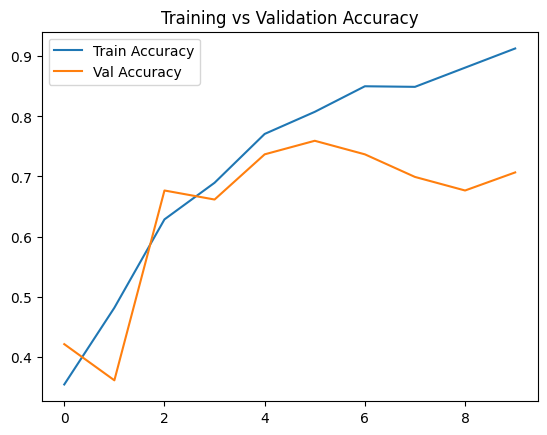

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load dataset (Train, Validation, Test) from TFDS
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'beans',
    split=['train', 'validation', 'test'],
    as_supervised=True,  # returns (image, label) pairs
    with_info=True       # returns dataset metadata
)

# Simple preprocessing: resize and normalize
def preprocess(image, label):
    image = tf.image.resize(image, [128, 128]) / 255.0
    return image, label

# Batch size
BATCH_SIZE = 32

# Apply preprocessing and batching
ds_train = ds_train.map(preprocess).batch(BATCH_SIZE)
ds_val   = ds_val.map(preprocess).batch(BATCH_SIZE)
ds_test  = ds_test.map(preprocess).batch(BATCH_SIZE)


# Define a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(ds_train, validation_data=ds_val, epochs=10)

# Evaluate on test set
test_loss, test_acc = model.evaluate(ds_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load and preprocess the dataset
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'beans',
    split=['train', 'validation', 'test'],
    as_supervised=True,  # returns (image, label) pairs
    with_info=True       # returns dataset metadata
)

# Preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, [128, 128]) / 255.0  # Resize and normalize
    return image, label

BATCH_SIZE = 32
ds_train = ds_train.map(preprocess).batch(BATCH_SIZE)
ds_val = ds_val.map(preprocess).batch(BATCH_SIZE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE)

def create_model(learning_rate=0.001, filter_size=(3, 3), num_layers=2, dropout_rate=0.5, optimizer='adam'):
    model = tf.keras.Sequential()

    # First Conv2D layer
    model.add(tf.keras.layers.Conv2D(32, filter_size, activation='relu', input_shape=(128, 128, 3)))
    model.add(tf.keras.layers.MaxPooling2D())

    # Add additional Conv2D layers based on num_layers parameter
    for _ in range(num_layers - 1):
        model.add(tf.keras.layers.Conv2D(64, filter_size, activation='relu'))
        model.add(tf.keras.layers.MaxPooling2D())

    # Flatten and add Dense layers
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))

    model.compile(optimizer=optimizer(learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# Define a list of hyperparameter combinations
hyperparameters = [
    {'learning_rate': 0.001, 'filter_size': (3, 3), 'num_layers': 2, 'dropout_rate': 0.5, 'optimizer': tf.keras.optimizers.Adam},
    {'learning_rate': 0.002, 'filter_size': (5, 5), 'num_layers': 3, 'dropout_rate': 0.3, 'optimizer': tf.keras.optimizers.Adam},
    {'learning_rate': 0.003, 'filter_size': (5, 5), 'num_layers': 2, 'dropout_rate': 0.5, 'optimizer': tf.keras.optimizers.SGD},
]

# Run the models with different hyperparameters
for params in hyperparameters:
    print(f"\nTraining with hyperparameters: {params}")

    model = create_model(
        learning_rate=params['learning_rate'],
        filter_size=params['filter_size'],
        num_layers=params['num_layers'],
        dropout_rate=params['dropout_rate'],
        optimizer=params['optimizer']
    )

    # Train the model
    model.fit(ds_train, epochs=5, validation_data=ds_val)

    # Evaluate on test data
    test_loss, test_acc = model.evaluate(ds_test)
    print(f"Test Accuracy: {test_acc:.2f}")



Training with hyperparameters: {'learning_rate': 0.001, 'filter_size': (3, 3), 'num_layers': 2, 'dropout_rate': 0.5, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>}
Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.3587 - loss: 2.1050 - val_accuracy: 0.3308 - val_loss: 1.2908
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3954 - loss: 1.0944 - val_accuracy: 0.5940 - val_loss: 0.8145
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6791 - loss: 0.7478 - val_accuracy: 0.6165 - val_loss: 0.8257
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6805 - loss: 0.7480 - val_accuracy: 0.7143 - val_loss: 0.6940
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7670 - loss: 0.5741 - val_accuracy: 0.7368 - val_loss: 0.5674
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.7656 - loss: 0.5911
Test Accuracy: 0.77

Training with hyperparameters: {'learning_rate': 0.002, 'filter_size': (5, 5), 'num_layers': 3, 'dropo